In [23]:
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [62]:
def compute_gradient(u,v):
    grad_u = 2*(u*np.exp(v)-2*v*np.exp(-u))*(np.exp(v)+2*v*np.exp(-u))
    grad_v = 2*(u*np.exp(v)-2*v*np.exp(-u))*(u*np.exp(v)- 2*np.exp(-u))
    return np.asarray([grad_u,grad_v])

In [59]:
def get_error(u,v):
    return np.asarray((u*np.exp(v) - 2*v*np.exp(-u))**2)

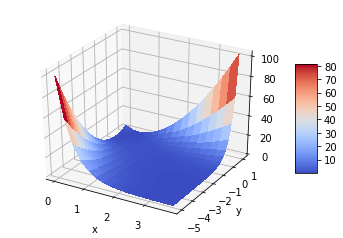

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(0, 4, 0.25)
Y = np.arange(-5, 1.1, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = get_error(X[i,j],Y[i,j])
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [66]:
u = 1.
v = 1.
thresh = 10**(-14)
w = np.asarray([u,v])
eta = 0.1
err = get_error(u,v)
#print('err',err)
count = 0
#print('w',w)
while err >= thresh:
    grad = compute_gradient(w[0], w[1])
    #print('grad',grad)
    w = w - eta * grad

    err = get_error(w[0],w[1])
    count += 1
print('err',err)
print(count)
print('w',w)



('err', array(1.2086833944220747e-15))
10
('w', array([ 0.04473629,  0.02395871]))


In [67]:
u = 1.
v = 1.
thresh = 10**(-14)
w = np.asarray([u,v])
eta = 0.1
err = get_error(u,v)
#print('err',err)
count = 0
#print('w',w)
while count < 15:
    grad = compute_gradient(w[0], w[1])
    #print('grad',grad)
    w = w - eta * np.asarray([grad[0],0])
    #print('w',w)
    grad = compute_gradient(w[0], w[1])
    w = w - eta * np.asarray([0,grad[1]])
    err = get_error(w[0],w[1])
    count += 1
print('err',err)
print(count)



('err', array(0.13981379199615315))
15


In [69]:
10**(-1)

0.1